In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from collections import defaultdict
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import pprint
import os
import reader

In [3]:
path = os.getcwd()+'/data/'
data = reader.Data(path)

Local data read/write folder path:
	Customed path: /Users/Dan/百度云同步盘/丝打底/2017 spring/MATH 497/code and data/data/

Data: systemic_disease_list 
File: systemic_disease_list.pickle
File already exists.

Data: SNOMED_problem_list 
File: SNOMED_problem_list.pickle
File already exists.

Data: macula_findings_for_Enc 
File: macula_findings_for_Enc.pickle
File already exists.

Data: SL_Lens_for_Enc 
File: SL_Lens_for_Enc.pickle
File already exists.

Data: family_hist_list 
File: family_hist_list.pickle
File already exists.

Data: systemic_disease_for_Enc 
File: systemic_disease_for_Enc.pickle
File already exists.

Data: family_hist_for_Enc 
File: family_hist_for_Enc.pickle
File already exists.

Data: all_encounter_data 
File: all_encounter_data.pickle
File already exists.

Data: encounters 
File: encounters.pickle
File already exists.

Data: demographics 
File: demographics.pickle
File already exists.

Data: ICD_for_Enc 
File: ICD_for_Enc.pickle
File already exists.


In [4]:
df=data['ICD_for_Enc']

In [5]:
df['Enc_Date'] = [datetime.strftime(item, '%Y-%m-%d') for item in df['Enc_Timestamp']]

In [6]:
df.head()

,Person_ID,Person_Nbr,Enc_ID,Enc_Nbr,Enc_Timestamp,Diagnosis_Code_ID,Description,Enc_Date
194529,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,367.4,Presbyopia,2014-12-18
194530,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,373.00,Blepharitis unspecified,2014-12-18
194531,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,250.00,Diabetes mellitus without mention of complicat...,2014-12-18
136763,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,365.02,Anatomical narrow angle borderline glaucoma,2012-10-16
136764,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,250.00,Diabetes Mellitus Type 2 Uncomplicated,2012-10-16


Group data by person_Nbr then by icd code. Same code may appear in different encounter. Same code may also appear within one encounter, which is suggested to keep only one.

In [ ]:
#{k:{k1:[item for item in v1.Enc_Nbr]
#    for k1,v1 in v.groupby('Diagnosis_Code_ID')} 
# for k,v in df.groupby('Person_Nbr')}

Give each person all codes with no duplication throughout all encounters

In [ ]:
#{k:list(v.drop_duplicates()) for k,v in df.groupby('Person_Nbr').Diagnosis_Code_ID}

Calculate the frequncy of each code. Calculate it as once if it ever appears in person's encounter history

In [7]:
ICD_frequency={k:len(v.drop_duplicates()) for k,v in df.groupby('Diagnosis_Code_ID').Person_Nbr}
sorted(ICD_frequency.items(), key=lambda x:x[1], reverse=True)[:5]

[('367.4', 8754),
 ('250.00', 8199),
 ('H52.4', 4218),
 ('375.15', 3894),
 ('E11.9', 3833)]

Only 4 codes have no descriptions, set them to be 'Null'.

In [8]:
j=0
for i in df.index:
    if type(df.Description[i])==float:
        # float value as nan, we need to give it a string value as 'Null'
        print(df.loc[i,])
        df.set_value(i, 'Description', 'Null')
        j+=1
print(j)

Person_ID            4b073812-5031-8836-311a-47f6b2bb1e50
Person_Nbr                                         362483
Enc_ID               1c15c16b-ca15-78ea-52eb-338392d027d7
Enc_Nbr                                           7354367
Enc_Timestamp                         2014-05-17 15:44:33
Diagnosis_Code_ID                                  378.83
Description                                           NaN
Enc_Date                                       2014-05-17
Name: 126893, dtype: object
Person_ID            a83e25df-000a-a8db-56a6-014579b7e5a1
Person_Nbr                                         378156
Enc_ID               6913f73a-2f15-0f2a-5ec9-4f0d627d8fb3
Enc_Nbr                                          12902433
Enc_Timestamp                         2013-03-19 19:45:00
Diagnosis_Code_ID                              367.4367.4
Description                                           NaN
Enc_Date                                       2013-03-19
Name: 90899, dtype: object
Person_ID        

In [9]:
ICD_dictionary={k:sorted(list(v.drop_duplicates()), key=lambda x: len(x), reverse=True) 
                for k,v in df.groupby('Diagnosis_Code_ID').Description}
ICD_dictionary.items()[1:5]

[('360.01', ['Acute endophthalmitis']),
 ('S05.01XA',
  ['Corneal abrasion without FB of right eye initial encounter',
   'Corneal abrasion w/o FB of right eye initial encounter',
   'Corneal abrasion w/o FB of rt eye initial encounter']),
 ('G44.201', ['Tension-type headache unspecified intractable']),
 ('H16.123', ['Filamentary keratitis bilateral'])]

## Proceeding separation of ICD 9 and ICD 10
There are codes in icd9 begining with characters 'V' and 'E'. For the 'E' part, icd9 has the form xxxx(.xx). But for the 'V' part forms in icd9 and icd10 are so similar that I can't tell. 

In [10]:
for k,v in ICD_dictionary.items():
    if ord(k[0])==69 and len(k.split('.')[0])==4:
        print(k,v)

('E986', ['Injury by cutting and piercing instruments undetermined whether accidentally or purposely inflicted'])
('E931.4', ['Antimalarials and drugs acting on other blood protozoa causing adverse effects in therapeutic use'])
('E931.3', ['Quinoline and hydroxyquinoline derivatives causing adverse effects in therapeutic use'])
('E914', ['Foreign body accidentally entering eye and adnexa'])


In [11]:
for k,v in ICD_dictionary.items():
    if ord(k[0])==86:
        print(k,v)

('V15.09', ['Other allergy other than to medicinal agents'])
('V08', ['Human immunodeficiency virus (HIV) infection without symptoms of the illness', 'Asymptomatic human immunodeficiency virus (hiv) infection status', 'Asymptomatic human immunodeficiency virus [HIV] infection status', 'Asymptomatic human immunodeficiency virus (hiv) in', 'HIV - Human immunodeficiency virus infection', 'HIV'])
('V80.1', ['Screening for glaucoma', 'Glaucoma screening'])
('V67.00', ['Follow-up examination following surgery unspecified'])
('V19.11', ['Family history of glaucoma'])
('V49.89', ['Other specified conditions influencing health status'])
('V72.0', ['Examination of eyes and vision', 'Exam of eyes and vision', 'Vision exam'])
('V70.3', ['General medical exam for driving license'])
('V58.69', ['Long-term (current) use of other medications', 'Long-term use of high-risk medication', 'Long term use of high risk medication', 'Current use of high risk medication', 'Current use of high-risk medication', 

### Tried to use pymedtermino to separate icd9 and icd10 (But it did not work correctly because I need to download the data from another source)
http://pythonhosted.org/PyMedTermino/. The module did not work so I tried date-division method.

In [ ]:
!pip install PyMedTermino

In [ ]:
#from pymedtermino import *
#from pymedtermino.icd10 import *
#ICD10["E10"]

### Why I can't just use the date to divide ICD9 and ICD10?!
Because I can't use a definite date (like '2015-10-01') as separation line for ICD9 and ICD10. When I run the following codes, it is obvious that during 2015-09-28 and 2015-10-04, utilization of ICD9 and ICD10 is mixed. The very first encounter in our data set was on 2011-10-28, the last one was on 2016-11-03.

In [ ]:
# The followin codes may take much memory and time. 
#temp={k: {k1:[item for item in v1.Diagnosis_Code_ID] 
#     for k1,v1 in v.groupby('Person_Nbr')}
# for k,v in df.groupby('Enc_Timestamp')}
#pprint.pprint(temp)

In [ ]:
#pprint.pprint(temp)

ICD 9 code is being used even long after 2015-10-03. Here is the case that there are still iCD 9 codes exist in the overlap of two code set after I separated them with date. For example, 250.00 is obvious a ICD 9 code which was still being used on 2016-06-01

In [12]:
print (len(df[df.Enc_Date<'2015-09-28'].Diagnosis_Code_ID.drop_duplicates()))
print (len(df[df.Enc_Date>'2015-10-04'].Diagnosis_Code_ID.drop_duplicates()))
print (len(df.Diagnosis_Code_ID.drop_duplicates()))

962
1182
2139


In [ ]:
# The following ICD 9 codes are still being used after 2015-10-04
set(df[df.Enc_Date<'2015-09-28'].Diagnosis_Code_ID.drop_duplicates())&set(df[df.Enc_Date>'2015-10-04'].Diagnosis_Code_ID.drop_duplicates())

In [13]:
temp=df[df.Enc_Date>'2015-10-04'].Diagnosis_Code_ID.drop_duplicates()
df.loc[temp[temp=='250.00'].index,]

,Person_ID,Person_Nbr,Enc_ID,Enc_Nbr,Enc_Timestamp,Diagnosis_Code_ID,Description,Enc_Date
178018,031910b8-92c5-354e-95b7-981f3cd0877e,70556,92cf571a-811e-d49f-bf0b-5198f968c4e5,5241244,2016-06-01 12:00:00,250.00,Type II diabetes mellitus without complication,2016-06-01


And there is still the problem that I can't tell the Vxx.xx code belongs to ICD 9 and ICD 10. After I extract the V codes after 2015-10-01 and manually look them up in ICD website. The description matches the corresponding ICD9 code description. So right now I can conclude all the codes begin with v belong to ICD 9. And Exxx(.xx) and all codes begin with number belong to ICD 9.

In [14]:
V_code=[k for k in ICD_dictionary.keys() if ord(k[0])==86]
{k:[{'Date':a, 'description':b} for a,b in zip(v.Enc_Date, v.Description) if a>'2015-10-01']
for k,v in df[df.Diagnosis_Code_ID.isin(V_code)].groupby('Diagnosis_Code_ID')}

{'V02.62': [],
 'V08': [{'Date': '2015-10-04', 'description': 'HIV'}],
 'V12.41': [],
 'V12.54': [],
 'V12.59': [],
 'V14.9': [],
 'V15.09': [],
 'V18.0': [],
 'V19.11': [],
 'V42.5': [{'Date': '2015-10-02',
   'description': 'Status post corneal transplant'}],
 'V43.0': [],
 'V43.1': [{'Date': '2016-02-15',
   'description': 'Lens replaced by other means'}],
 'V45.61': [],
 'V45.69': [],
 'V45.78': [],
 'V49.89': [],
 'V53.1': [],
 'V58.32': [],
 'V58.49': [{'Date': '2016-05-14',
   'description': 'Other specified aftercare following surgery'},
  {'Date': '2015-11-29',
   'description': 'Other specified aftercare following surgery'}],
 'V58.69': [{'Date': '2016-07-04',
   'description': 'Therapeutic Drug Monitoring'}],
 'V58.83': [],
 'V65.5': [],
 'V67.00': [],
 'V67.51': [],
 'V67.59': [],
 'V70.3': [],
 'V72.0': [],
 'V74.4': [],
 'V77.1': [],
 'V80.1': [],
 'V85.25': [],
 'V87.49': []}

### Manually divide ICD 9 and ICD 10 according to the conclusion above.

In [15]:
ICD_9_dictionary={}
ICD_10_dictionary={}
for k,v in ICD_dictionary.items():
    if ord(k[0])==69 and len(k.split('.')[0])==4:
        # All 'Exxx(.xx)' codes should belong to icd 9
        ICD_9_dictionary[k]=v
    elif ord(k[0])==86:
        # All the v-codes should belong to icd 9
        ICD_9_dictionary[k]=v
    elif ord(k[0]) in range(65,91) and len(k.split('.')[0])==3:
        # Except the two cases above, codes started with character and the fourth digit is '.' belong to icd 10
        ICD_10_dictionary[k]=v
    else:
        ICD_9_dictionary[k]=v
print ('Distict ICD 9 codes: ',len(ICD_9_dictionary))
print ('Distinct ICD 10 codes: ', len(ICD_10_dictionary))

('Distict ICD 9 codes: ', 964)
('Distinct ICD 10 codes: ', 1175)


###  Codes may have multiple descriptions in data
The most descriptions contained in one code is 39 for code '250.00', which encourages me to find a standard and official explanation for each code.

In [16]:
sorted({k:len(v) for k,v in ICD_dictionary.items()}.items(), key=lambda x:x[1], reverse=True)[:5]

[('250.00', 39), ('365.01', 20), ('E11.9', 18), ('250.52', 14), ('E11.8', 13)]

### Tried to use R programming to validate ICD 9 and ICD 10
There is a R package callled icd from https://github.com/jackwasey/icd. It may recognize all the V-codes as in ICD 9, however, it may recognize all E-codes as in ICD 9 too. which does not follow the rules. This package offers no information on the ancestors and converters. And its library only contains some of the explanation, which is still not specific enough for ICD 10 codes. I got 'Null' values for the 'invalid' codes, the correctness still needs to be tested.

In [17]:
# Export all disctinct codes into a .txt file
df.Diagnosis_Code_ID.drop_duplicates().to_csv(path+'ICD_codes.txt', index=False)

There are 16 codes with null values exist in officail explanation, and these are all invalid codes in ICD 9 system 

(actually the results turns out to be 24, more than 16, but the some of them were wrongly recognized as short form of some icd 9 cm codes with no consistence as their description)

In [18]:
ICD_9_codes_R=pd.read_csv(path+'icd9_codes_R.csv')
print('ICD_9_codes amount according to R validation:', len(ICD_9_codes_R))
print(len(ICD_9_codes_R[ICD_9_codes_R.official_explanation=='Null']))
print(list(ICD_9_codes_R[ICD_9_codes_R.official_explanation=='Null'].codes))

('ICD_9_codes amount according to R validation:', 964)
24
['RETINAL', '00.01', '00.10', '10.91', '11.60', '11.75', '12.14', '12.64', '13.41', '13.43', '13.65', '13.69', '13.70', '14.32', '14.34', '14.39', '14.41', '16.49', '16.92', '95.26', '95.34', '97.31', '362.362.54', '367.4367.4']


There are 68 codes with null values in official explanation exist in ICD 10 table, and some of them in invalid and the others are due to the accuracy of the package.

In [19]:
ICD_10_codes_R=pd.read_csv(path+'icd10_codes_R.csv')
print('ICD_10_codes amount according to R validation:', len(ICD_10_codes_R))
print(len(ICD_10_codes_R[ICD_10_codes_R.official_explanation=='Null']))
print(list(ICD_10_codes_R[ICD_10_codes_R.official_explanation=='Null'].codes))

('ICD_10_codes amount according to R validation:', 1175)
68
['E08.3212', 'E08.3213', 'E08.3293', 'E08.3313', 'E08.3393', 'E08.3412', 'E08.3513', 'E10.3291', 'E10.3292', 'E10.3293', 'E10.3391', 'E10.3392', 'E10.3513', 'E10.3593', 'E11.3211', 'E11.3212', 'E11.3213', 'E11.3291', 'E11.3292', 'E11.3293', 'E11.3311', 'E11.3312', 'E11.3313', 'E11.3391', 'E11.3392', 'E11.3393', 'E11.3411', 'E11.3413', 'E11.3491', 'E11.3492', 'E11.3493', 'E11.3511', 'E11.3512', 'E11.3513', 'E11.3522', 'E11.3551', 'E11.3552', 'E11.3553', 'E11.3591', 'E11.3592', 'E11.3593', 'H34.8110', 'H34.8120', 'H34.8310', 'H34.8312', 'H34.8321', 'H34.8322', 'H35.3112', 'H35.3131', 'H35.3132', 'H35.3212', 'H35.3221', 'H35.3223', 'H35.3230', 'H40.1111', 'H40.1112', 'H40.1113', 'H40.1121', 'H40.1122', 'H40.1123', 'H40.1131', 'H40.1132', 'H40.1133', 'H40.1134', 'L03.213', 'R73.03', 'Z79.84', 'Z98.890']


## Proceeding ICD 9 codes
### Look into the invalid codes exist in my divided ICD 9 part.
#### 1. The codes with description 'null' in the data set
Since ICD_9_dictionary's value is sorted decreasingly by the length of descriptions, I can extract the 3 invalid cases. Remember we have in total 4 null values in data description, another code has other non-null descriptions so it could not be invalid.

In [20]:
invalid_code_1={k:v for k,v in ICD_9_dictionary.items() if v[0]=='Null' and len(v)==1}
invalid_code_1

{'362.362.54': ['Null'], '367.4367.4': ['Null'], 'RETINAL': ['Null']}

For these values, they all exist only once over all data. And another code also exists meanwhile in the same encounter, which means these inexplanable codes are typos. So we can delete them directly from the previous dict and dataframe.(ICD_9_dictionary, original data set df, ICD_9_codes_R and ICD_frequency)

In [21]:
{k:ICD_frequency[k] for k in invalid_code_1.keys()}

{'362.362.54': 1, '367.4367.4': 1, 'RETINAL': 1}

In [22]:
{k:{k1:[item for item in zip(v1.Diagnosis_Code_ID, v1.Description)]
    for k1,v1 in v.groupby('Enc_Nbr')}  
 for k,v in df[df.Enc_Nbr.isin(
     df[df.Diagnosis_Code_ID.isin(invalid_code_1)].Enc_Nbr)].groupby('Person_Nbr')}

{378156: {12902433: [('367.4', 'Presbyopia/ Accommodative Insufficiency'),
   ('367.4367.4', 'Null')]},
 782773: {6965466: [('362.40', 'Retinal layer separation unspecified'),
   ('RETINAL', 'Null')]},
 1037105: {1454725: [('362.54', 'Macular cyst hole or pseudohole of retina'),
   ('362.362.54', 'Null')]}}

In [23]:
for item in invalid_code_1:
    ICD_9_dictionary.pop(item, None)
len(ICD_9_dictionary)

961

In [24]:
ICD_9_codes_R = ICD_9_codes_R.drop(ICD_9_codes_R[ICD_9_codes_R.codes.isin(invalid_code_1)].index)
ICD_9_codes_R.shape

(961, 2)

In [25]:
for item in invalid_code_1:
    ICD_frequency.pop(item, None)
len(ICD_frequency)

2136

In [26]:
df=df.drop(df[df.Diagnosis_Code_ID.isin(invalid_code_1)].index)
df.shape

(207252, 8)

#### 2. The codes with digits less than 3 before the point
According to the hint by R processed codes, there exist codes in ICD 9 that disobey the coding rule and have no sufficient officaial explanation in R package. These codes could be invaid for CM too. And codes in 'xx.xx' form are found to be icd 9 procedure codes after looking up their descriptions on website http://www.icd9data.com/2015/Volume3/default.htm. So I extract them here.

In [27]:
invalid_code_2={k:v for k,v in ICD_9_dictionary.items() if len(k.split('.')[0])<3}
invalid_code_2

{'00.01': ['THER ULT HEAD & NECK VES'],
 '00.10': ['IMPLANT CHEMOTHERA AGENT'],
 '10.91': ['SUBCONJUNCTIVAL INJECT'],
 '11.60': ['CORNEAL TRANSPLANT NOS'],
 '11.75': ['RADIAL KERATOTOMY'],
 '12.14': ['IRIDECTOMY NEC'],
 '12.64': ['TRABECULECTOM AB EXTERNO'],
 '13.41': ['CATARAC PHACOEMULS/ASPIR'],
 '13.43': ['CATARACT FRAG/ASPIR NEC'],
 '13.65': ['AFTER-CATARACT EXCISION'],
 '13.69': ['CATARACT EXTRACTION NEC'],
 '13.70': ['INSERT PSEUDOPHAKOS NOS'],
 '14.32': ['RETINAL TEAR CRYOTHERAPY'],
 '14.34': ['RETINAL TEAR LASER COAG'],
 '14.39': ['RETINAL TEAR REPAIR NEC'],
 '14.41': ['SCLERAL BUCKLE W IMPLANT'],
 '16.49': ['EYEBALL ENUCLEATION NEC'],
 '16.92': ['EXCISION ORBITAL LESION'],
 '95.26': ['GLAUCOMA TESTING'],
 '95.34': ['OCULAR PROSTHETICS'],
 '97.31': ['REMOVE EYE PROSTHESIS']}

Although these procedure codes are not quite frequent in the data set. I would better separate them with those ICD 9 CM codes and ICD 10 CM codes. Delete them from ICD_9_dictionary and ICD_9_codes_R.

In [28]:
{item:ICD_frequency[item] for item in invalid_code_2.keys()}

{'00.01': 1,
 '00.10': 1,
 '10.91': 1,
 '11.60': 3,
 '11.75': 1,
 '12.14': 1,
 '12.64': 1,
 '13.41': 1,
 '13.43': 1,
 '13.65': 2,
 '13.69': 3,
 '13.70': 3,
 '14.32': 1,
 '14.34': 1,
 '14.39': 2,
 '14.41': 1,
 '16.49': 8,
 '16.92': 1,
 '95.26': 1,
 '95.34': 5,
 '97.31': 1}

In [29]:
ICD_9_PCS_dictionary = invalid_code_2
for item in invalid_code_2:
    ICD_9_dictionary.pop(item, None)
len(ICD_9_dictionary)

940

In [30]:
ICD_9_codes_R = ICD_9_codes_R.drop(ICD_9_codes_R[ICD_9_codes_R.codes.isin(invalid_code_2)].index)
ICD_9_codes_R.shape

(940, 2)

### Plot the most frequent codes

In [31]:
ICD_9_frequency={k:ICD_frequency[k] for k in ICD_9_dictionary.keys()}

[('367.4', 'Presbyopia'),
 ('250.00',
  'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled'),
 ('375.15', 'Tear film insufficiency, unspecified'),
 ('366.19', 'Other and combined forms of senile cataract'),
 ('367.1', 'Myopia'),
 ('367.0', 'Hypermetropia'),
 ('367.20', 'Astigmatism, unspecified'),
 ('373.00', 'Blepharitis, unspecified'),
 ('365.01', 'Open angle with borderline findings, low risk'),
 ('362.11', 'Hypertensive retinopathy')]


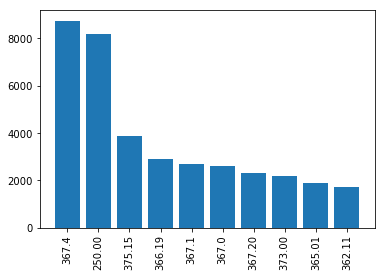

In [32]:
temp=sorted(ICD_9_frequency.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],ICD_9_codes_R.set_index('codes').loc[k[0], 'official_explanation']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.show()

### Get the first-three-digit-ancestors  for the codes
Extract the ancestor as the part before dot. There are 175 different ancestors in ICD 9 data

Calculate the ancesotr's frequency in person's overall history, and plot a histgram. People with codes in 367 category are even more than the total amount of the patient sample.

In [33]:
ICD_9_ancestor_frequency=defaultdict(int)
for k in ICD_9_dictionary.keys():
    ICD_9_ancestor_frequency[k.split('.')[0]] += ICD_frequency[k]
sorted(ICD_9_ancestor_frequency.items(), key=lambda x: x[1], reverse=True)[:10]

[('367', 17148),
 ('362', 9566),
 ('250', 9120),
 ('366', 7170),
 ('365', 6178),
 ('375', 3981),
 ('373', 2803),
 ('379', 1925),
 ('401', 1489),
 ('372', 1423)]

There are 190 different ancestors in ICD 9 data

In [34]:
len(ICD_9_ancestor_frequency.keys())

190

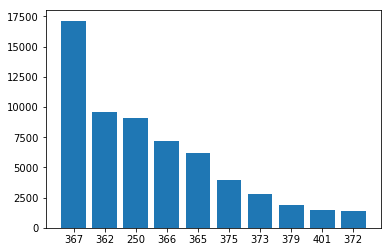

In [35]:
temp=sorted(ICD_9_ancestor_frequency.items(), key=lambda x:x[1], reverse=True)[:10]
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp])
plt.show()

367 category contains 13 different more specific codes in our data set.

In [36]:
temp={k:len(v.Person_Nbr.drop_duplicates())
      for k,v in df.groupby('Diagnosis_Code_ID') if k.split('.')[0]=='367'}
temp

{'367.0': 2593,
 '367.1': 2711,
 '367.2': 1,
 '367.20': 2316,
 '367.21': 667,
 '367.22': 24,
 '367.31': 61,
 '367.4': 8754,
 '367.51': 6,
 '367.53': 1,
 '367.81': 9,
 '367.89': 4,
 '367.9': 1}

But most people have one or more conditions as following:

In [37]:
temp={k:[k1 for k1 in v.Diagnosis_Code_ID.drop_duplicates() if k1.split('.')[0]=='367'] 
 for k,v in df.groupby('Person_Nbr')}
#temp

In [38]:
Counter([len(v) for v in temp.values()])

Counter({0: 4904, 1: 7513, 2: 2661, 3: 1314, 4: 86, 5: 4, 7: 1})

###  Get a copied dataframe from the r-processed file and add an ancestor column to it

In [ ]:
ICD_9_df=ICD_9_codes_R.copy()

In [ ]:
ICD_9_df['ancestor'] = [k.split('.')[0] for k in ICD_9_df.codes]
ICD_9_df.head()

### Query these ICD code and their ancestors through Aqua API, find more infomation of their categories and converters to ICD 10, and add to the dateframe

In [ ]:
!pip install aqua-io

In [ ]:
import aqua_io
client = aqua_io.Client({ 'client_id': 'ad84e9c56d8a3696e004ed386b2726f5664f778084ac8d3d108efdab5da5d2e1', 
                         'client_secret': 'e5d6d5b370a8f58d5bd243792b99238e67c3150de8dee81408ba9162cdf2e786'})
token = client.access_token().retrieve()
access_token = {'access_token': token.body['access_token']}
client = aqua_io.Client(access_token)

In [ ]:
# Fn+cmd+/
# icd9 = client.icd9()

# ancestor_description=[]
# converter=[]
# count=0
# for i in ICD_9_df.index:
#     count+=1
#     if count % 100 == 0:
#         print(count)
#     code=ICD_9_df.loc[i,'codes'].replace('.', '-')
#     try:
#         response = icd9.single_code(code)
#         temp1 = [{'ancestor': item['ancestor']['name'].encode('utf8'), 
#                   'hierarchy': item['ancestor']['hierarchy'],
#                   'description': item['ancestor']['description'].encode('utf8')} 
#                 for item in response.body['ancestors']]
#         temp2 = [{'converter': item['equivalent']['name'].encode('utf8'), 
#                   'system': item['equivalent']['code_system'].encode('utf8'),
#                   'strength': item['equivalent']['relationship'].encode('utf8'),
#                   'strength_explanation': item['equivalent']['relationship_explanation'].encode('utf8')} 
#                  for item in response.body['equivalents']]
#     except:
#         temp1=['Null']
#         temp2=['Null']
#     ancestor_description.append(temp1)
#     converter.append(temp2)


In [ ]:
converter_snomed=[[{'code': i['converter'], 'strength': i['strength_explanation']} 
                   for i in item if i['system']=='SNOMED (concept)']
                  for item in converter]
converter_icd10=[[{'code': i['converter'], 'strength': i['strength_explanation']} 
                   for i in item if i['system']=='ICD-10']
                 for item in converter]

In [ ]:
ICD_9_df['ancestors_all'] = ancestor_description
ICD_9_df['converter_snomed'] = converter_snomed
ICD_9_df['converter_icd10'] = converter_icd10
ICD_9_df.head()

In [ ]:
max([len(item) for item in ancestor_description])

In [ ]:
sorted([len(item) for item in converter_snomed],reverse=True)[:10]

In [ ]:
sorted([len(item) for item in converter_icd10],reverse=True)[:10]

In [ ]:
for i in ICD_9_df.index:
    if len(ICD_9_df.loc[i,'converter_icd10'])==159:
        print(ICD_9_df.loc[i,])

In [ ]:
ICD_9_frequency['995.29']

In [ ]:
ICD_9_df.to_pickle(path+'ICD_9_library_df.pickle')

In [39]:
ICD_9_df=pd.read_pickle(path+'ICD_9_library_df.pickle')
ICD_9_df.head()

,codes,official_explanation,ancestor,ancestors_all,converter_snomed,converter_icd10
6,011.90,"Pulmonary tuberculosis, unspecified, unspecified",011,"[{u'ancestor': u'001-139', u'description': u'i...","[{u'code': u'154283005', u'strength': u'comple...","[{u'code': u'A15.0', u'strength': u'nearly ide..."
20,042,Human immunodeficiency virus [HIV] disease,042,"[{u'ancestor': u'001-139', u'description': u'i...","[{u'code': u'86406008', u'strength': u'complet...","[{u'code': u'B20', u'strength': u'completely e..."
21,053.20,Herpes zoster dermatitis of eyelid,053,"[{u'ancestor': u'001-139', u'description': u'i...","[{u'code': u'186525007', u'strength': u'comple...","[{u'code': u'B02.39', u'strength': u'nearly id..."
22,053.21,Herpes zoster keratoconjunctivitis,053,"[{u'ancestor': u'001-139', u'description': u'i...","[{u'code': u'42448002', u'strength': u'complet...","[{u'code': u'B02.33', u'strength': u'completel..."
23,053.22,Herpes zoster iridocyclitis,053,"[{u'ancestor': u'001-139', u'description': u'i...","[{u'code': u'10698009', u'strength': u'complet...","[{u'code': u'B02.32', u'strength': u'completel..."


## Proceeding ICD 10 codes
### Look into the possible invalid codes exist in my divided ICD 10 part.

In [40]:
invalid_code=list(ICD_10_codes_R[ICD_10_codes_R.official_explanation=='Null'].codes)
{k:ICD_frequency[k] for k in invalid_code}

{'E08.3212': 1,
 'E08.3213': 1,
 'E08.3293': 1,
 'E08.3313': 2,
 'E08.3393': 3,
 'E08.3412': 1,
 'E08.3513': 1,
 'E10.3291': 1,
 'E10.3292': 1,
 'E10.3293': 4,
 'E10.3391': 1,
 'E10.3392': 1,
 'E10.3513': 3,
 'E10.3593': 5,
 'E11.3211': 4,
 'E11.3212': 1,
 'E11.3213': 7,
 'E11.3291': 10,
 'E11.3292': 15,
 'E11.3293': 26,
 'E11.3311': 1,
 'E11.3312': 4,
 'E11.3313': 5,
 'E11.3391': 6,
 'E11.3392': 3,
 'E11.3393': 18,
 'E11.3411': 3,
 'E11.3413': 4,
 'E11.3491': 1,
 'E11.3492': 3,
 'E11.3493': 4,
 'E11.3511': 3,
 'E11.3512': 5,
 'E11.3513': 10,
 'E11.3522': 1,
 'E11.3551': 1,
 'E11.3552': 2,
 'E11.3553': 6,
 'E11.3591': 5,
 'E11.3592': 2,
 'E11.3593': 21,
 'H34.8110': 1,
 'H34.8120': 2,
 'H34.8310': 2,
 'H34.8312': 1,
 'H34.8321': 2,
 'H34.8322': 3,
 'H35.3112': 1,
 'H35.3131': 2,
 'H35.3132': 1,
 'H35.3212': 1,
 'H35.3221': 1,
 'H35.3223': 1,
 'H35.3230': 1,
 'H40.1111': 10,
 'H40.1112': 9,
 'H40.1113': 9,
 'H40.1121': 9,
 'H40.1122': 8,
 'H40.1123': 6,
 'H40.1131': 29,
 'H40.1132': 18,

In [41]:
{k: ICD_dictionary[k] for k in invalid_code}

{'E08.3212': ['Diabetes mellitus due to underlying condition with mild nonproliferative diabetic retinopathy with macular edema left eye'],
 'E08.3213': ['Diabetes mellitus due to underlying condition with mild nonproliferative diabetic retinopathy with macular edema bilateral'],
 'E08.3293': ['Diabetes mellitus due to underlying condition with mild nonproliferative diabetic retinopathy without macular edema bilateral'],
 'E08.3313': ['Diabetes mellitus due to underlying condition with moderate nonproliferative diabetic retinopathy with macular edema bilateral'],
 'E08.3393': ['Diabetes mellitus due to underlying condition with moderate nonproliferative diabetic retinopathy without macular edema bilateral'],
 'E08.3412': ['Diabetes mellitus due to underlying condition with severe nonproliferative diabetic retinopathy with macular edema left eye'],
 'E08.3513': ['Diabetes mellitus due to underlying condition with proliferative diabetic retinopathy with macular edema bilateral'],
 'E10.3

### Plot the most frequent codes

In [42]:
ICD_10_frequency={k:ICD_frequency[k] for k in ICD_10_dictionary.keys()}

[('H52.4', 'Presbyopia'),
 ('E11.9', 'Type 2 diabetes mellitus without complications'),
 ('H04.123', 'Dry eye syndrome of bilateral lacrimal glands'),
 ('H25.813', 'Combined forms of age-related cataract, bilateral'),
 ('I10', 'Essential (primary) hypertension'),
 ('H40.013', 'Open angle with borderline findings, low risk, bilateral'),
 ('Z96.1', 'Presence of intraocular lens'),
 ('H52.13', 'Myopia, bilateral'),
 ('H35.033', 'Hypertensive retinopathy, bilateral'),
 ('E11.329',
  'Type 2 diabetes mellitus with mild nonproliferative diabetic retinopathy without macular edema')]


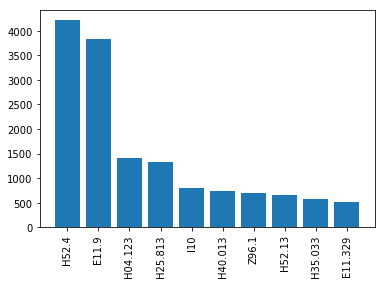

In [43]:
temp=sorted(ICD_10_frequency.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],ICD_10_codes_R.set_index('codes').loc[k[0], 'official_explanation']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.show()

### Get the first-three-digit-ancestors for the codes
Extract the ancestor as the part before dot. Calculate the ancesotr's frequency in person's overall history, and plot a histgram.

In [44]:
ICD_10_ancestor_frequency=defaultdict(int)
for k in ICD_10_dictionary.keys():
    ICD_10_ancestor_frequency[k.split('.')[0]] += ICD_frequency[k]
sorted(ICD_10_ancestor_frequency.items(), key=lambda x: x[1], reverse=True)[:10]

[('H52', 5966),
 ('E11', 5567),
 ('H40', 2903),
 ('H25', 2636),
 ('H35', 1544),
 ('H04', 1443),
 ('H01', 874),
 ('I10', 798),
 ('Z96', 698),
 ('H53', 473)]

There are 172 different ancestors in ICD 10 data

In [45]:
len(ICD_10_ancestor_frequency)

172

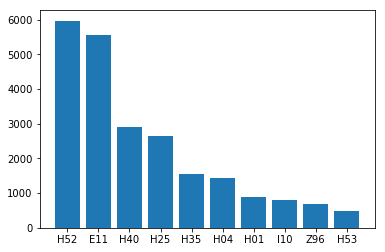

In [46]:
temp=sorted(ICD_10_ancestor_frequency.items(), key=lambda x:x[1], reverse=True)[:10]
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp])
plt.show()

###  Get a copied dataframe from the r-processed file and add an ancestor column to it

In [ ]:
ICD_10_df=ICD_10_codes_R.copy()

In [ ]:
ICD_10_df['ancestor'] = [k.split('.')[0] for k in ICD_10_df.codes]
ICD_10_df.head()

### Query these ICD code and their ancestors through Aqua API, find more infomation of their categories and converters to ICD 9, and add to the dateframe
Among the 60 invalid codes, there are 15 that can be accessed via the API. However, the rest 45 codes can't be looked up in API, otherwise there will be error. So I developed the following codes to look up ancestors with one digit less than the invalid codes, and then add these ancestors into the portfolio.

In [ ]:
# icd10 = client.icd10()

# ancestor_description=[]
# converter=[]
# count=0
# for i in ICD_10_df.index:
#     count+=1
#     if count % 100 == 0:
#         print(count)
#     code=ICD_10_df.loc[i,'codes'].replace('.', '-')
#     flag=False
#     while(True):
#         try:
#             #print(code)
#             response = icd10.single_code(code)
#             temp1 = [{'ancestor': item['ancestor']['name'].encode('utf8'), 
#                   'hierarchy': item['ancestor']['hierarchy'],
#                   'description': item['ancestor']['description'].encode('utf8').lower()} 
#                 for item in response.body['ancestors']]
#             temp2 = [{'converter': item['equivalent']['name'].encode('utf8'), 
#                   'system': item['equivalent']['code_system'].encode('utf8'),
#                   'strength': item['equivalent']['relationship'].encode('utf8'),
#                   'strength_explanation': item['equivalent']['relationship_explanation'].encode('utf8')} 
#                  for item in response.body['equivalents']]
#             if flag:
#                 temp1.append({'ancestor': response.body['name'].encode('utf8'),
#                               'hierarchy': max([item['ancestor']['hierarchy']
#                                                 for item in response.body['ancestors']])+1,
#                               'description': response.body['description'].encode('utf8')})
#             break
#         except:
#             if(len(code)<6):
#                 temp1=['Null']
#                 temp2=['Null']
#                 break
#             code=code[:len(code)-1]
#             flag=True
#             #print('error again')

#     ancestor_description.append(temp1)
#     converter.append(temp2)
#     #print(temp1, temp2)

In [ ]:
converter_snomed=[[{'code': i['converter'], 'strength': i['strength_explanation']} 
                   for i in item if i['system']=='SNOMED (concept)']
                  for item in converter]
converter_icd9=[[{'code': i['converter'], 'strength': i['strength_explanation']} 
                   for i in item if i['system']=='ICD-9']
                 for item in converter]

In [ ]:
ICD_10_df['ancestors_all'] = ancestor_description
ICD_10_df['converter_snomed'] = converter_snomed
ICD_10_df['converter_icd9'] = converter_icd9
ICD_10_df.head()

In [ ]:
ICD_10_df.to_pickle(path+'ICD_10_library_df.pickle')

In [ ]:
max([len(item) for item in ancestor_description])

In [ ]:
max([len(item) for item in converter_snomed])

In [ ]:
max([len(item) for item in converter_icd9])

In [47]:
ICD_10_df=pd.read_pickle(path+'ICD_10_library_df.pickle')
ICD_10_df.head()

,codes,official_explanation,ancestor,ancestors_all,converter_snomed,converter_icd9
0,A51.43,Secondary syphilitic oculopathy,A51,"[{u'hierarchy': 1, u'ancestor': u'A00-B99', u'...","[{u'code': u'30080002', u'strength': u'[1.1] -...","[{u'code': u'091.50', u'strength': u'nearly id..."
1,A92.0,Chikungunya virus disease,A92,"[{u'hierarchy': 1, u'ancestor': u'A00-B99', u'...","[{u'code': u'111864006', u'strength': u'[1.1] ...","[{u'code': u'065.4', u'strength': u'nearly ide..."
2,B00.52,Herpesviral keratitis,B00,"[{u'hierarchy': 1, u'ancestor': u'A00-B99', u'...","[{u'code': u'9389005', u'strength': u'[1.2] - ...","[{u'code': u'054.42', u'strength': u'nearly id..."
3,B00.59,Other herpesviral disease of eye,B00,"[{u'hierarchy': 1, u'ancestor': u'A00-B99', u'...","[{u'code': u'27023008', u'strength': u'[1.2] -...","[{u'code': u'054.41', u'strength': u'nearly id..."
4,B00.9,"Herpesviral infection, unspecified",B00,"[{u'hierarchy': 1, u'ancestor': u'A00-B99', u'...","[{u'code': u'23513009', u'strength': u'[1.1] -...","[{u'code': u'054.8', u'strength': u'nearly ide..."


### Add a column of system name to the icd df and write into a pickle file

In [60]:
temp=df.copy()
temp=temp.drop(['Enc_Date'], axis = 1)

In [64]:
def classify(code):
    if code in ICD_9_dictionary.keys():
        return 'icd9'
    elif code in ICD_10_dictionary.keys():
        return 'icd10'
    elif code in ICD_9_PCS_dictionary.keys():
        return 'icd9_PCS'
temp['System']=temp.Diagnosis_Code_ID.map(lambda x: classify(x))

In [65]:
temp.head()

,Person_ID,Person_Nbr,Enc_ID,Enc_Nbr,Enc_Timestamp,Diagnosis_Code_ID,Description,System
194529,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,367.4,Presbyopia,icd9
194530,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,373.00,Blepharitis unspecified,icd9
194531,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,250.00,Diabetes mellitus without mention of complicat...,icd9
136763,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,365.02,Anatomical narrow angle borderline glaucoma,icd9
136764,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,250.00,Diabetes Mellitus Type 2 Uncomplicated,icd9


In [67]:
temp.to_pickle(path+'ICD_for_Enc_processed_Dan_20170304.pickle')

### How many patients have diabetes or DR?

In [48]:
temp={k:[item[:3] for item in v.drop_duplicates() if item not in ICD_9_PCS_dictionary.keys()]
 for k,v in df.groupby('Person_Nbr').Diagnosis_Code_ID}

In [49]:
diabetes_code=['250','E08','E09','E10','E11','E13','O24']

In [50]:
diabetes=[k for k,v in temp.items() if len(set(v)&set(diabetes_code))>0]

In [51]:
non_diabetes=[k for k,v in temp.items() if len(set(v)&set(diabetes_code))==0]

In [52]:
len(non_diabetes)

4698

In [53]:
temp=sorted({k:len(v.Person_Nbr.drop_duplicates())
 for k,v in df[df.Person_Nbr.isin(non_diabetes)].groupby('Diagnosis_Code_ID') if k[:5]=='362.0'}.items(), 
            key=lambda x:x[1], reverse=True)[:10]
sum([k[1] for k in temp])

2475

In [54]:
ICD_9_df[ICD_9_df.codes.isin([k[0] for k in temp])]

,codes,official_explanation,ancestor,ancestors_all,converter_snomed,converter_icd10
222,362.01,Background diabetic retinopathy,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'390834004', u'strength': u'comple...","[{u'code': u'E11.319', u'strength': u'nearly i..."
223,362.02,Proliferative diabetic retinopathy,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'59276001', u'strength': u'complet...","[{u'code': u'E11.359', u'strength': u'nearly i..."
224,362.03,Nonproliferative diabetic retinopathy NOS,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'390834004', u'strength': u'comple...","[{u'code': u'E11.329', u'strength': u'nearly i..."
225,362.04,Mild nonproliferative diabetic retinopathy,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'312903003', u'strength': u'comple...","[{u'code': u'E11.329', u'strength': u'nearly i..."
226,362.05,Moderate nonproliferative diabetic retinopathy,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'312904009', u'strength': u'comple...","[{u'code': u'E11.339', u'strength': u'nearly i..."
227,362.06,Severe nonproliferative diabetic retinopathy,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'312905005', u'strength': u'comple...","[{u'code': u'E11.349', u'strength': u'nearly i..."
228,362.07,Diabetic macular edema,362,"[{u'ancestor': u'320-389', u'description': u'd...","[{u'code': u'312912001', u'strength': u'comple...","[{u'code': u'E11.311', u'strength': u'nearly i..."


In [55]:
index=ICD_9_df[ICD_9_df.codes=='362.01'].index
ICD_9_df.ix[index,'converter_icd10']

222    [{u'code': u'E11.319', u'strength': u'nearly i...
Name: converter_icd10, dtype: object